# Регрессия для чайников

Сначала немного лирики для закрепления / понимания теории.

Для начала, регрессия - это замечательная универсальная штука, которую вы РЕАЛЬНО можете использовать в своих курсовых / статьях / проектах и т.д. (если кто-то еще в этом сомневается).

As yo know, **Регрессия** - способ объяснить зависимость одной переменной от другой / других независимых.

Вот несколько жизненных примеров, чтобы еще лучше усвоить, что есть зависимая (Y), а что - независимая (X) переменная.

*(предсказать НЕ РАВНО нагадать, мы не гадалки, нет. Предсказать = предположить.
Регрессия полагает, а Бог располагает, как говорится. Крутой компьютер из США во времена Холодной войны тоже полагал (что в войне победит СССР), но получилось как получилось. Считайте, поэтому говорим "предсказать")*

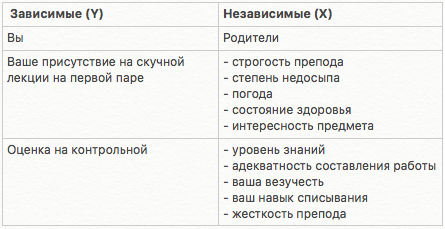

Таким образом, с помощью регрессии через независимые переменные мы можем *предсказать* значение зависимой переменной. 

***By the way:*** аналогичная схема работает и с нашими курсовыми: предмет исследования - зависимая переменная (Y; процесс / явление, динамику изменения которого вы рассматриваете), факторы, которые вы выделяете как влияющие - это независимые переменные (X). Теории МО, в свою очередь, по сути, присваивают коэффициенты независимым переменным (определяют значимость их вклада в изменение Y) - говорят, насколько важен(-ы) тот или иной фактор(ы).

**Построить регрессию = Объяснить переменную Y набором переменных X  = Восстановить функцию**

***Почему "восстановить"?***

Вспомним философию и Платона. Где-то там все эти данные во всех их комбинациях уже кто-то проанализировал, и функции (формулки), которые их задают, уже существуют - в виде *идей*, как у Платона. Поэтому мы функцию ВОССТАНАВЛИВАЕМ - восстанавливаем когда-то забытую нами *идею* этой функции.


# А ТЕПЕРЬ ПРАКТИКА  - КОД ДЛЯ ЧАЙНИКОВ# 
###  С настолько подробными пояснениями, насколько это, пожалуй, возможно ###

##### *(Если у вас вдруг все-таки возник вопрос в духе "а это что" "а зачем" "а как" "а куда" "а почему", то (а) задайте его ассистенам / преподавателям, (б) вам этого знать особо и не нужно)* #####
__________________________________________________________________________

**1. Подгружаем все нужные библиотеки**

In [1]:
import pandas as pd               # для работы с таблицами
import numpy as np                # куда без него
import matplotlib.pyplot as plt   # пакет, чтобы делать красивые графички
import seaborn as sns             # ещё  пакет для графичков 
%matplotlib inline                # чтобы картинки сразу показывались (без "print") 

UsageError: unrecognized arguments: # чтобы картинки сразу показывались (без print)


**2.1. Загружаем данные**

и даем табличке удобоваримое название - чем проще, тем лучше


In [2]:
df = pd.read_csv('DataLE.csv')   #df часто называют, потому что это сокращение от dataframe

**2.2. Знакомимся с данными**

Будем анализировать *детерминанты **продолжительности жизни***. Человеческим языком: построим модель, которая показывает, насколько различные факторы (имеющиеся в таблице
) влияют на продолжительность жизни

Нужно понять, что таблица из себя представляет. Для этого достаточно посмотреть несколько первых строчек - функция **head()**.
- функцию ставим, соответственно, после обозначения данных, к которым хотим ее применить - **df.head()**
- в скобочках можно указать количество первых строк, которые хотите посмотреть, например - **df.head(20)** - отобразятся первые 20 строк.* (если зададите слишком большое число, строки посередине просто отобразяться как точечки **".."**)*

     ***BTW:*** *Выводить все необязательно. При работе с питоном нам, по идее, вообще все равно, какие где конкретно цифры. Нужно только иметь представление о столибиках/колонках, чтобы смочь указаать питону на то, что нужно, и приказать что-то сделать. Считайте, что это просто ваш раб*

In [3]:
df.head(20)

,Country Name,Country Code,Lifeexpectancy,Agriculturaland,Children_out_of_school_primary,Fertility_rate,GDP,GDP_per_capita,High-technology_exports,Household_final_consumption,Individuals_using_the_Internet,Labor_force,Population
0,Afghanistan,AFG,63.298195,379100.0,NaN,4.80200,1.921556e+10,569.577923,1.536347e+07,1.620225e+10,8.260000,10087656.0,33736494.0
1,Albania,ALB,78.203146,11743.0,NaN,1.71400,1.133526e+10,3934.895394,1.512366e+07,9.129271e+09,63.252933,1333025.0,2880703.0
2,Algeria,DZA,75.855293,414564.0,40114.0,2.83900,1.658743e+11,4160.220067,2.449466e+06,6.806889e+10,38.200000,11798754.0,39871528.0
3,American Samoa,ASM,NaN,49.0,NaN,NaN,6.590000e+08,11865.963230,1.334346e+07,4.420000e+08,NaN,NaN,55537.0
4,Andorra,AND,NaN,188.1,NaN,NaN,2.811489e+09,36038.267600,2.313243e+07,NaN,96.910000,NaN,78014.0
5,Angola,AGO,61.189341,591900.0,NaN,5.76600,1.029622e+11,3695.793748,2.324340e+05,7.846566e+10,12.400000,11464497.0,27859305.0
6,Antigua and Barbuda,ATG,76.075634,90.0,1012.0,2.06300,1.364863e+09,13659.147910,5.782120e+05,NaN,70.000000,NaN,99923.0
7,Arab World,ARB,71.028439,4796187.1,NaN,3.37384,2.563302e+12,6435.525509,2.179234e+07,1.403996e+12,39.867463,129331522.0,398304960.0
8,Argentina,ARG,76.293024,1487000.0,NaN,2.30800,5.847115e+11,13467.102360,1.442451e+09,3.827074e+11,68.043064,19486807.0,43417765.0
9,Armenia,ARM,74.206195,16764.3,5250.0,1.62200,1.055334e+10,3617.935746,1.106779e+07,8.240058e+09,59.102378,1398281.0,2916950.0


**3. Проводим чистку** (у всех проскочила ассоциация с прайдовыми чистками? - история не за горами:) )

В таблице видем **NaN** - это значит, что в ячейке пусто, данных нет. Соответстенно, что использовать мы их не можем, да и питон не захочет - нужно от них избавиться .

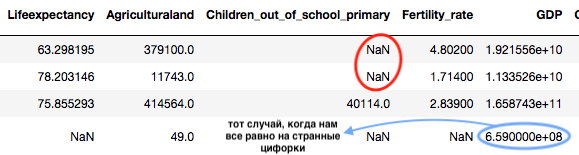

**НО сначала** нужно вообще понять, сколько их и где. Для этого запускаем функцию **info()**, которая выдает нам сведения о таблице, и **isnull().sum()**, которая скажет, где их и сколько

Знать количество NaN нужно для того, чтобы понять, что с ними вообще делать. Можно просто убрать (здесь так и сделаем), можно заменить средним значением оставшихся показателей в столбце, если их не слишком много (иначе данные будут сильно искажены).

Примечание от МБ: нам, конечно, все равно на странные циферки, но вообще е+10 -это значит, что мы умножаем чиселку на 10 в степени 10. Например 5е+03 - это 5 умножить на 10 в степени 3. То есть, 5 умножить на 1000. То есть, 5000.

**3.1. Выводим информацию о таблице**

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
Country Name                       264 non-null object
Country Code                       264 non-null object
Lifeexpectancy                     244 non-null float64
Agriculturaland                    256 non-null float64
Children_out_of_school_primary     113 non-null float64
Fertility_rate                     247 non-null float64
GDP                                243 non-null float64
GDP_per_capita                     244 non-null float64
High-technology_exports            160 non-null float64
Household_final_consumption        215 non-null float64
Individuals_using_the_Internet     248 non-null float64
Labor_force                        232 non-null float64
Population                         262 non-null float64
dtypes: float64(11), object(2)
memory usage: 26.9+ KB


Country Name                         0
Country Code                         0
Lifeexpectancy                      20
Agriculturaland                      8
Children_out_of_school_primary     151
Fertility_rate                      17
GDP                                 21
GDP_per_capita                      20
High-technology_exports            104
Household_final_consumption         49
Individuals_using_the_Internet      16
Labor_force                         32
Population                           2
dtype: int64

**Что все это значит:**



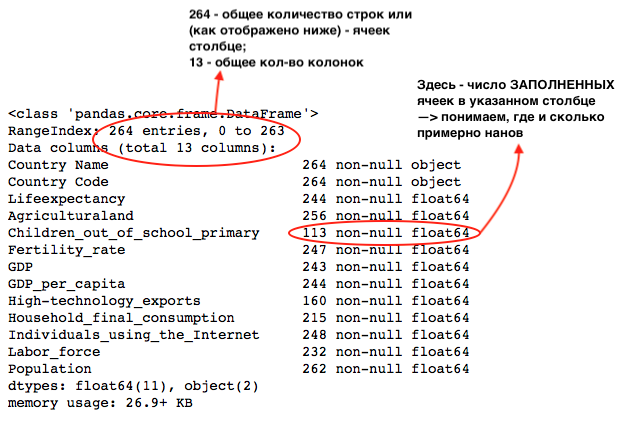

Во второй таблице все понятно - просто количество пустых ячеек. Можете соотнести с первой и проверить :)

**3.2. Дропаем наны (= убираем пустые ячейки)**

В нашем случае мы их просто убираем, и делается это через функцию **dropna()**

В скобочках пишем **inplace=True** - говорите питону, чтобы сам все поменял и не паритесь.

***BTW:*** *если вы встречаете какие-то страшные непонятные вещи внутри скобочек и не можете понять, что же этот параметр меняет в работе функции (хотя понимать это, если честно, в нашем случае не всегда обязательно:)...), то просто смотрите краткое описание функции и ее параметров здесь - https://pandas.pydata.org/pandas-docs/stable/index.html (если речь про pandas) или здесь - https://seaborn.pydata.org/index.html(если проблемы с seaborn). Или на любом другом подобном сайте для соответствующей библиотеки. Прочитаете, поймете, и сможете поистине творить (особенно актуально для построения визуализации). Ну а вообще всегда можно загуглить.*

In [6]:
df.dropna(inplace=True)

Опять запускаем **isnull().sum()**, чтобы проверить наверняка, удалилось или нет.

In [7]:
df.isnull().sum()

Country Name                       0
Country Code                       0
Lifeexpectancy                     0
Agriculturaland                    0
Children_out_of_school_primary     0
Fertility_rate                     0
GDP                                0
GDP_per_capita                     0
High-technology_exports            0
Household_final_consumption        0
Individuals_using_the_Internet     0
Labor_force                        0
Population                         0
dtype: int64

**Ура! Наны дропнулись!**

**4. Описательные статистики**

Выводим статистики для каждого столбца (нет, не по-отдельности), чтобы иметь представление о переменных (факторах / показателях). Прежде всего нас интересуют независимые переменные (предикторы) - то, что влияет на продолжительность жизни.

Делаем это через функцию **describe()**

In [8]:
df.describe()

,Lifeexpectancy,Agriculturaland,Children_out_of_school_primary,Fertility_rate,GDP,GDP_per_capita,High-technology_exports,Household_final_consumption,Individuals_using_the_Internet,Labor_force,Population
count,75.000000,7.500000e+01,7.500000e+01,75.000000,7.500000e+01,75.000000,7.500000e+01,7.500000e+01,75.000000,7.500000e+01,7.500000e+01
mean,73.935682,3.252034e+05,2.518803e+05,2.383307,5.486425e+11,16992.747309,1.182839e+10,3.338212e+11,56.429041,1.470157e+07,3.111661e+07
std,7.338478,7.846949e+05,7.687125e+05,1.141672,2.129496e+12,20003.395415,3.261785e+10,1.437683e+12,27.153496,2.775835e+07,5.777576e+07
min,51.412854,8.600000e+01,3.600000e+02,1.230000,3.066681e+09,300.676557,3.509400e+04,2.631894e+09,4.866224,2.003220e+05,4.318740e+05
25%,70.779878,1.706215e+04,4.795000e+03,1.626000,1.886306e+10,3477.021216,2.584767e+07,1.273819e+10,30.117890,2.367072e+06,4.742344e+06
50%,75.068000,3.949000e+04,1.670100e+04,1.929000,6.810262e+10,8757.206202,2.979392e+08,4.592740e+10,63.306625,4.918059e+06,1.019927e+07
75%,79.384793,1.866550e+05,9.338550e+04,2.747500,3.001974e+11,23514.154920,4.323522e+09,1.754490e+11,77.176045,1.196195e+07,2.590001e+07
max,83.490244,4.058625e+06,5.599070e+06,5.781000,1.812071e+13,82016.021310,1.855562e+11,1.233226e+13,96.810300,1.607678e+08,3.208966e+08


Теперь визуализируем данные по предикторам (независимым переменным / факторам, влияющим на продолжительность жизни) (а) выкину зависимую переменную, т.е. продолжительность жизни "Lifeexpectancy" через функцию **drop('Lifeexpectancy',axis=1)** (через **axis** задаете, что именно убираете - строку (0) или столбик (1)) **И** (б) построив гистограммы с помощью **hist()**. В скобочка задаем размер картинки **figsize=(20, 12)** (можете поэксперементировать).

**Получается --> **

Примечание от МБ: мы это еще не делали, не переживайте. Графики мы научимся строить отдельно!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a10141940>,
      dtype=object)

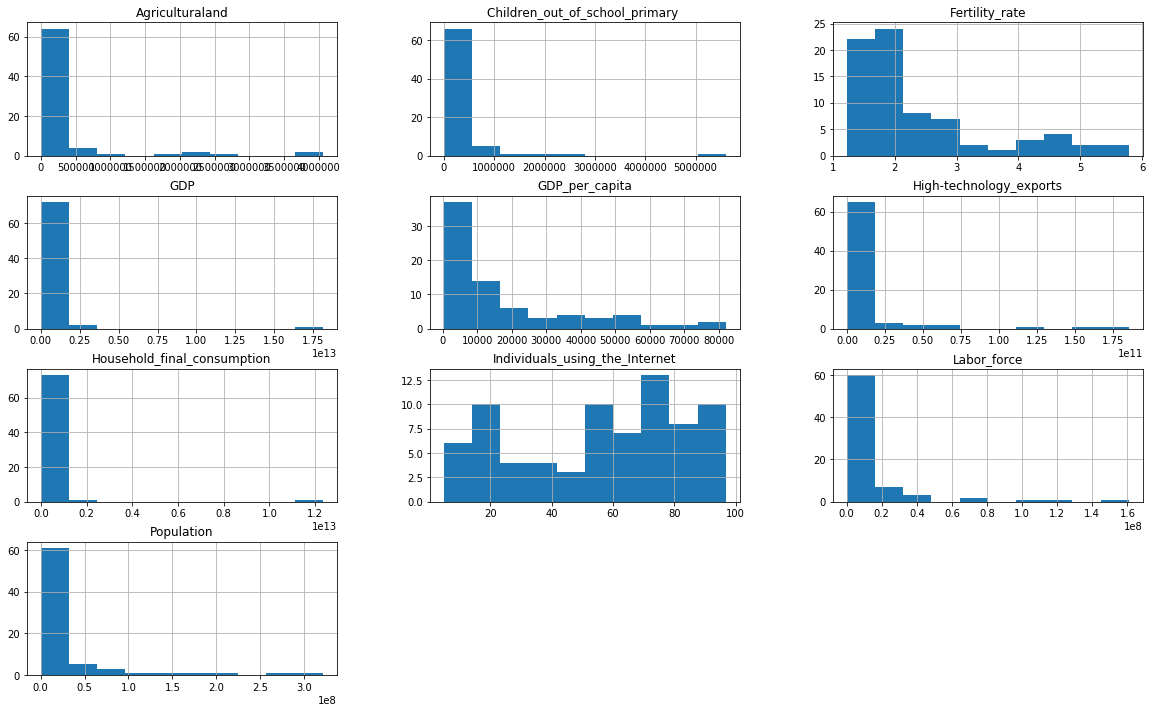

In [8]:
df.drop('Lifeexpectancy',axis=1).hist(figsize=(20, 12))

*(мы построили гистограммы по столбцам всей таблицы, кроме Lifeexpectancy, которую дропнули, и питон выдал нам это единой картинкой)*

*Регулировать размер / поворот текста и делать визуализацию съедобной научитесь позже, это отдельная история))*

**5. Мультиколлинеарность**

Проще говоря, это наложение детерминантов (независимых переменных / факторов) друг на друга - их корреляция между собой. В модели все должно быть четко: есть факторы, они влияют на зависимую переменную. Все. Друг на друга они влиять не должны. НО ничего не идеально в этом мире и, конечно же, они друг на друга влияют и все сильо путают, и модель из-за этого получается стремная.

***Что с этим делать???***

Проверять на мультиколлениарность - "вычищать" модель от взаимо-влияющих факторов, перекрестных корреляций.

Примечание от МБ: ну только помните, что корреляции - не повод говорить про влияние. Это просто взаимосвязь. Так что мы не знаем, что там с этими сильно связанными переменными. Просто они измняются одновременно: например, обе увеличиваются параллельно (положительная корреляция)

***Как это делать???***

Воспринимайте это как медитацию. Серьезно. Это очень просто, но требует (а) спокойствия, (б) сосредоточенности (ну хоть чуть-чуть) - не суетиться / не паниковать / не пугаться.


**5.1. Строим таблицу корреляций**

Делаем это с помощью библиотеки **seaborn (sns)** и функции **heatmap** (heat_map - все понятно, да). И еще задаем с помощью библиотеки **matplotlib.pyplot (plt)** и функции **figure(figsize=)** размер таблицы - чтобы все не слиплось (можете попробовать просто убрать строчку с этим действием и посмотреть, что получится. Только скопировать ее не за будьте перед этим).

Примечание от МБ: мы еще это не проходили, так что можно сделать просто через corr():

In [9]:
df.corr()

,Lifeexpectancy,Agriculturaland,Children_out_of_school_primary,Fertility_rate,GDP,GDP_per_capita,High-technology_exports,Household_final_consumption,Individuals_using_the_Internet,Labor_force,Population
Lifeexpectancy,1.000000,0.047142,-0.276942,-0.830213,0.167480,0.659064,0.309918,0.147844,0.829774,-0.010557,-0.039208
Agriculturaland,0.047142,1.000000,0.174419,-0.045126,0.625796,0.161689,0.247571,0.619751,0.086976,0.638189,0.610537
Children_out_of_school_primary,-0.276942,0.174419,1.000000,0.275570,0.173742,-0.164639,0.021009,0.181100,-0.357462,0.572453,0.658377
Fertility_rate,-0.830213,-0.045126,0.275570,1.000000,-0.130671,-0.412929,-0.237601,-0.115863,-0.732334,-0.051318,-0.013746
GDP,0.167480,0.625796,0.173742,-0.130671,1.000000,0.315936,0.657062,0.998579,0.158900,0.708271,0.675178
GDP_per_capita,0.659064,0.161689,-0.164639,-0.412929,0.315936,1.000000,0.417101,0.292809,0.724850,0.044214,0.017265
High-technology_exports,0.309918,0.247571,0.021009,-0.237601,0.657062,0.417101,1.000000,0.625468,0.318876,0.449465,0.411533
Household_final_consumption,0.147844,0.619751,0.181100,-0.115863,0.998579,0.292809,0.625468,1.000000,0.136861,0.700661,0.669033
Individuals_using_the_Internet,0.829774,0.086976,-0.357462,-0.732334,0.158900,0.724850,0.318876,0.136861,1.000000,-0.077148,-0.117132
Labor_force,-0.010557,0.638189,0.572453,-0.051318,0.708271,0.044214,0.449465,0.700661,-0.077148,1.000000,0.991151


А так предложила Соня. Можете делать так уже сейчас. Но, в любом случае, мы это будем обсуждать еще.

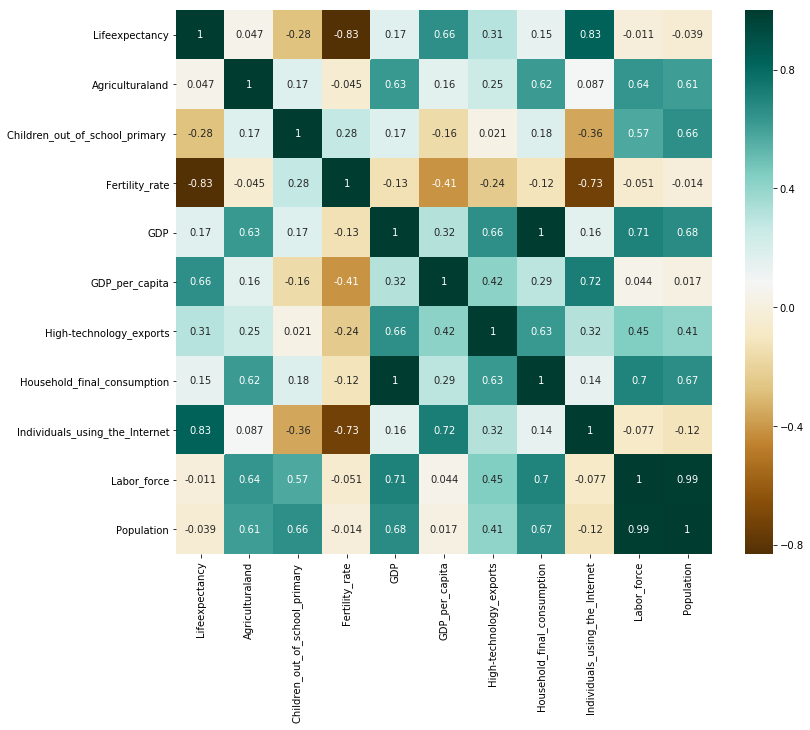

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='BrBG');

**Теперь подробнее про sns.heatmap**

sns.heatmap(df.corr(), annot=True, cmap='BrBG')
- df.corr() - это функция корреляций на основе наших данных (которые наззываются **df**)
- annot - наличие (True)/ отсутствие (просто убираете этот параметр) подписей в ячейках
- cmap - задает палетку (цветовую гамму)

**¡¡ВНИМАНИЕ ЛАЙФХАК!!**
*С цветами можно играть как душе угодно, это классно. Об этом будет подронбее говорить в блоке визуализации. А пока - советы по визуализации таблицы корреляций:*
- *выбирайте палетки, у которых крайние оттенки - одной интенсивности, т.е. чтобы он зеркально расходилась, а не от светлого к темному, например. Иначе дальше будет неудобно ориентироваться, т.к. нам нужно будет искать близкие к 1 значения*
- *вот здесь можно посмотреть, какие еще парамтеры могут быть у тепловой карты, как ее можно редактировать: https://seaborn.pydata.org/generated/seaborn.heatmap.html (ну и в принципе все, что угодно по этой библиотеке); здесь - наборы палеток с готовыми обозначениями - копируете и вставляете в код -  изи: (1) https://seaborn.pydata.org/tutorial/color_palettes.html (самые класные наборы), (2) https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/ (тоже ничего)*

Итак, у нас есть красивая табличка - что с ней делать?

Лучше всего ее распечатать - так удобней, но можно и с компьютера - придется просто быть внимательнее.
Наша задача, убрать все ячейки, где показатель больше 0,7 по модулю (т.е. больше 0.7 и меньше -0.7. Вообще, на самом деле, эта граница вполне подвижна и лучше уточнить у Маргариты Борисовны, до какой степени вычищать в индивид. проекте).

Видим темный-темный квадрат. Например, вот этот (как удачно у нас тут единица затесалась).

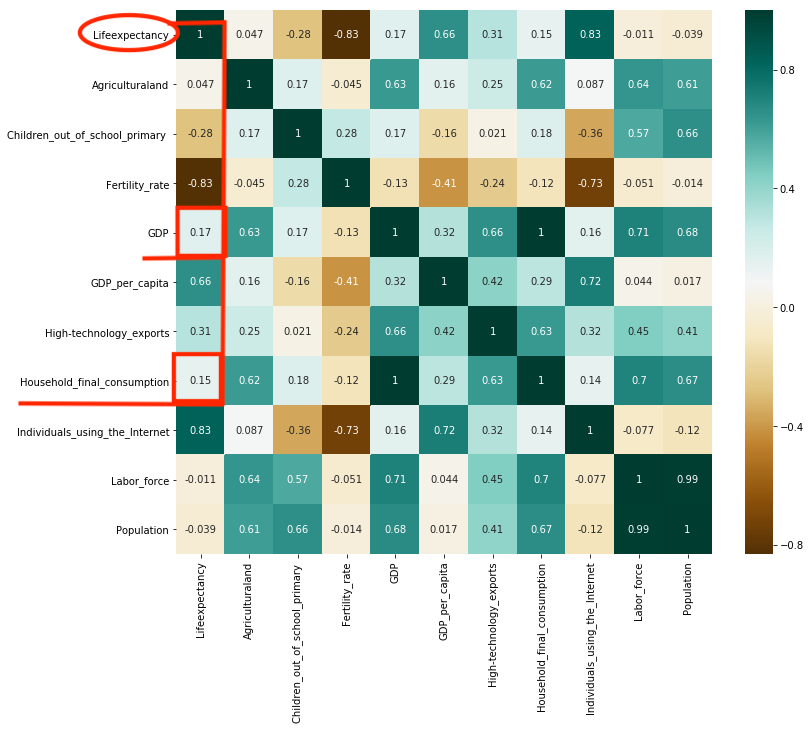

***BTW:*** Единицы по диагонали - пересечение фактора с самим собой. По сути анализируем только одну сторону от этой диагонали, т.к. пары дублирутюся.

**Это значит, что** что факторы ***Household_final_consumption*** и ***GDP*** находятся в прямой зависимости друг от друга, причем оооочень сильной. Какой-то из них придется убрать.

**5.2. Сравниваем взаимокоррелирующие факотры**

Сравниваем, насоклько зависит от каждого из них определяемая нами переменная (зависимая, Y) - и оставляем ту, которая влияет на независимую переменную больше (*вообще можно любую из них убирать, но так логичнее - оставлять то, что вносит бОльший вклад в изменение Y*).

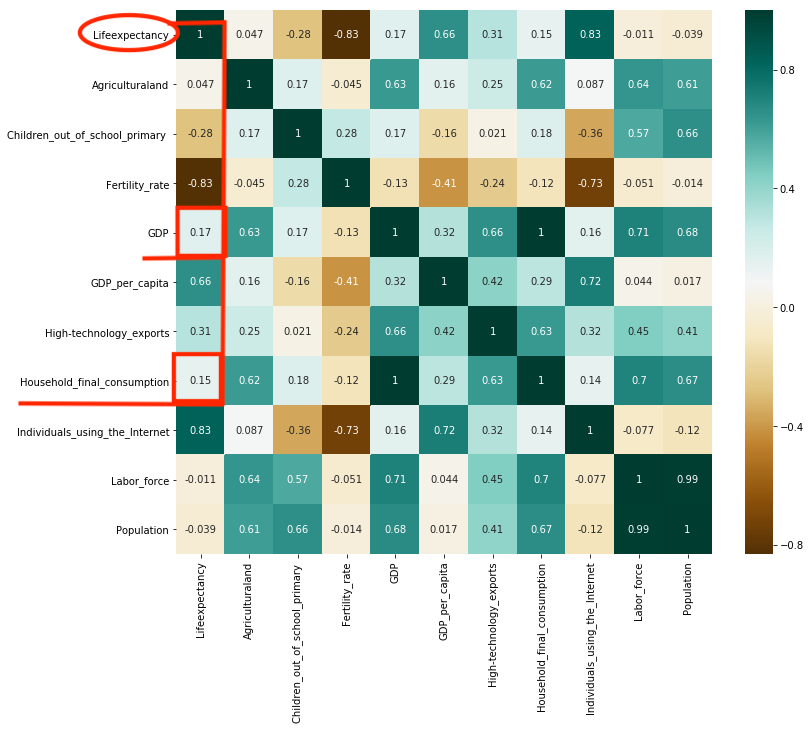

Видим, что GDP вносит бОльший влкда в изменение ***Lifeexpectancy*** (хоть и не намного) 
--> 

**5.3. Дропаем ненужный(-е) фактор(-ы)**

Убрали ***Household_final_consumption*** --> повторям с другими темными квадратами и фатокрами.

**Как дропаем?**
(а) просто записываем ВСЕ дропнутые фаткоры на листочек / в заметки / куда угодно, пока не наберется список, после завершения "чистки"
(б) - в ячейке ниже пишем заготовку кода и вставляем последовательно названия факторов, которые нужно дропнуть.

***Суть:*** на основе уже имеющейся базы данных, именованной как **df**, мы создаем новую (например, **df1**), которая  = **df**, из которой дропнули ненуные факторы.

Код следующий (посмотрим на примере дропнутого ***Household_final_consumption***):
- задаем новую "обновленную" базу данных **df1**, которая = **df**, из которой выкинули **drop** соответствующий фактор
- **axis=1** означает, что вы указываете питону на то, что убрать этот самый ***Household_final_consumption*** надо из столбца (1 - столбец, 0 - строка)
- строим новую тепловую карту (копируя код из первоначальной ее ячейки и вместо старой **df** подставляя **df1**)

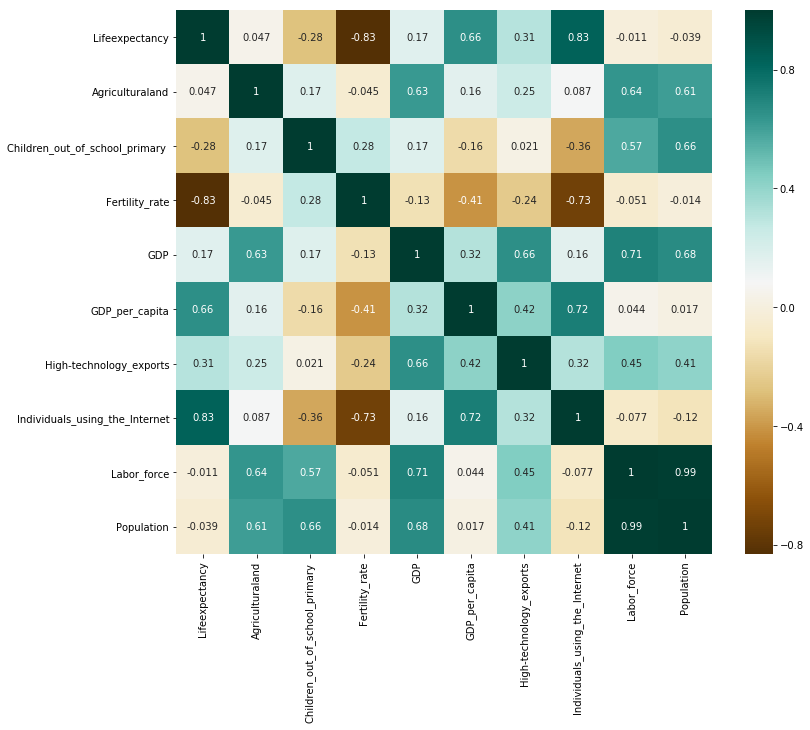

In [10]:
df1 = df.drop(['Household_final_consumption'], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, cmap='BrBG');

Все, ***Household_final_consumption*** больше в таблице нет. Продолжаем в том же духе:
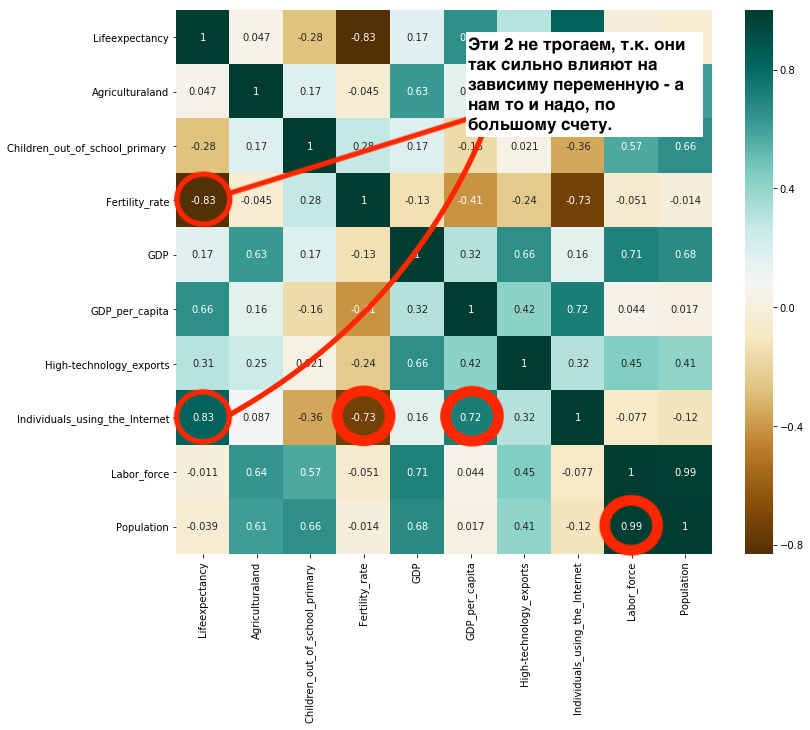

Итак, сравнив, пары коррелирующих друг с другом независимых переменных убираем (кроме уже выкинутого ***Household_final_consumption***):
- **Individuals_using_the_Internet** (хотя можно было убрать и Fertility_rate, т.к. по модулю они равны, НО тут включаем логику: вероятно, коэффициент рождаемости будет более весомым для показателей продолжительности жизни, нежели чем данные о пользовнии интернетом)))));
- Labor_force

Вставляем все это в код:

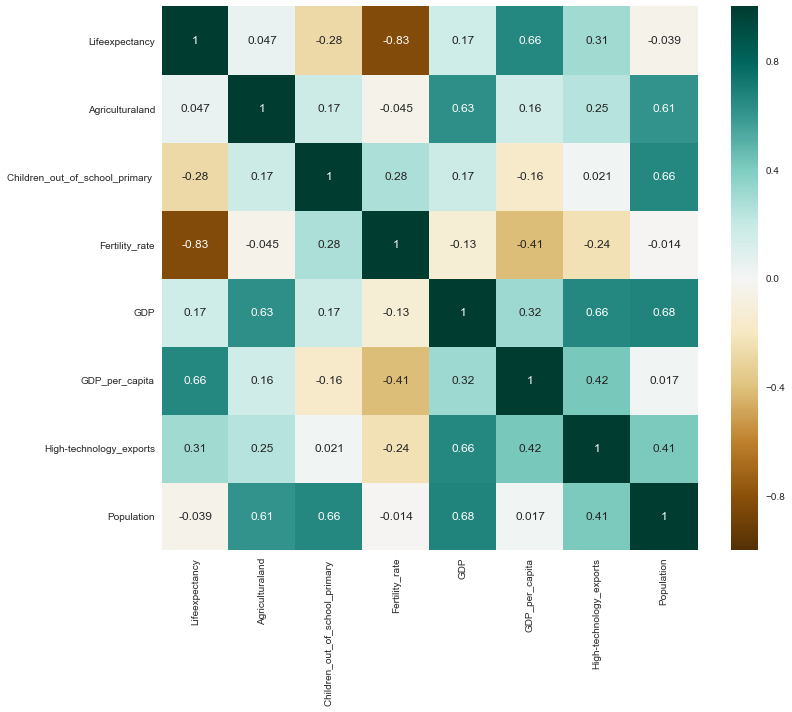

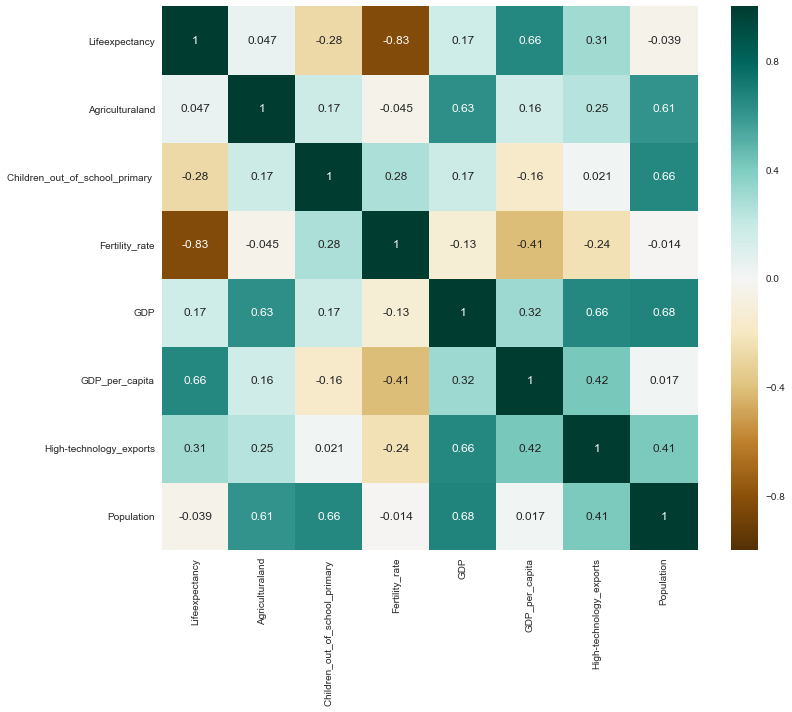

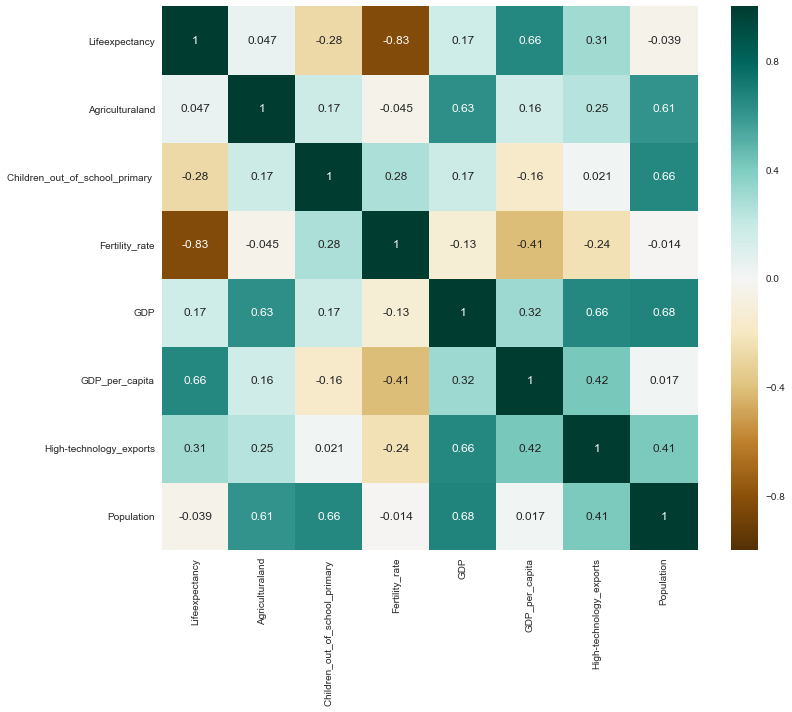

In [12]:
df1 = df.drop(['Household_final_consumption','Individuals_using_the_Internet','Labor_force'], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, cmap='BrBG')
plt.show()

Тадааааам! Получилась красивая, вполне удобоваримая карта.

Выводим новую таблицу.

In [12]:
df1 = df.drop(['Household_final_consumption','Individuals_using_the_Internet','Labor_force'], axis=1)
df1.head(6)

,Country Name,Country Code,Lifeexpectancy,Agriculturaland,Children_out_of_school_primary,Fertility_rate,GDP,GDP_per_capita,High-technology_exports,Population
2,Algeria,DZA,75.855293,414564.0,40114.0,2.839,1.658743e+11,4160.220067,2.449466e+06,39871528.0
9,Armenia,ARM,74.206195,16764.3,5250.0,1.622,1.055334e+10,3617.935746,1.106779e+07,2916950.0
11,Australia,AUS,82.451220,3659130.0,59470.0,1.833,1.345383e+12,56408.340430,4.237457e+09,23789338.0
13,Azerbaijan,AZE,71.845195,47698.0,29661.0,1.970,5.307437e+10,5500.310382,9.446115e+06,9649341.0
15,Bahrain,BHR,76.865195,86.0,2139.0,2.056,3.112585e+10,22688.878240,2.346787e+07,1371855.0
18,Belarus,BLR,73.624390,85820.0,16599.0,1.724,5.645473e+10,5949.106307,5.606895e+08,9489616.0


**Поздравляю, вы отобрали предикторы!(столбики)**

**6. Собственно регрессия**

**6.1.Подгружаем библиотеку для регрессий:**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**6.2. Задаем переменные и прочие параметры регрессии:**
- Y - то, ЧТО будем предсказывать, зависимая переменная. В нащем случае это показатель ***Lifeexpectancy*** из набора данных **df1**
- Х - предикторы, ПО КОТОРЫМ будем предсказывать зависимую переменную - то самое, что мы только что отобрали: показатели:
    - ***Agriculturaland***
    - ***Children_out_of_school_primary***
    - ***GDP***
    - ***GDP_per_capita***
    - ***Fertility_rate***
    - ***High-technology_export***
    - ***Population*** 
   из набора данных **df1**
- остальное просто копируем)) (небольшие поясненя - в коде)

In [14]:
Y = df1['Lifeexpectancy']
X = df1[['Agriculturaland','Children_out_of_school_primary ','GDP','GDP_per_capita','Fertility_rate','High-technology_exports','Population']]


In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y) #Делим на обучающую и тестовую (валидационную) выборку

model = LinearRegression() #Выбрали линейную регрессию в качестве нужной модели
model.fit(X_train, Y_train) #Обучили модель

Y_train_predicted = model.predict(X_train) # Предсказали значения зависимой переменной для обучающей выборки
Y_val_predicted = model.predict(X_val)# Предсказали значения зависимой переменной для тестовой выборки
train_error = mean_squared_error(Y_train_predicted, Y_train) #Считаем ошибку для обучающей выборки
val_error = mean_squared_error(Y_val_predicted, Y_val) #Считаем ошибку на валидации

print('Ошибка на обучении:  \t', train_error)
print('Ошибка на валидации:\t', val_error)
print('Разница:\t\t', val_error - train_error)

Ошибка на обучении:  	 9.682618897169306
Ошибка на валидации:	 12.923295702822331
Разница:		 3.2406768056530257


In [22]:
print("Коэффициенты независимых переменных:    ", model.coef_)
print("Коэффициент смещения: ", model.intercept_)

Коэффициенты независимых переменных:     [ 2.07589078e-07  6.88933516e-07 -1.65004027e-13  1.32957156e-04
 -4.90097520e+00  1.77640590e-11 -1.14621550e-08]
Коэффициент смещения:  82.95586816520003


Коэффициент смещения - это то место, где прямая регрессии пересекла ось игрек.
Коэффициенты независимых переменных - это про вклад независимых переменных.

ТО ЕСТЬ:

Здесь мы могли бы записать уравнение регрессии в виде: Y = 2.07589078e-07 * $X_1$ + 6.88933516e-07 * $X_2$ +..... + 82.95586816520003 (пять пропущенных независимых переменных с коэффициентами допишите сами)

# Собственно все. 
# Вы восхитительны!

In [ ]:
# The notebook was prepared by Sonya Akhmanaeva [2018].